# Editing visualizations for readability

1. Importing libraries and data
2. Quality checks
3. Crosstabs
4. Bar chart viz
5. Line chart vizs

## 1. Importing libraries and data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Creating path to root folder
path = r"C:\Users\cavba\Documents\Instacart Basket Analysis"

In [3]:
#Importing active customers data set with customer profile and weekday field created
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers_final.pkl'))

In [4]:
df.head()

,user_id,Gender,STATE,Age,date_joined,number_of_dependants,family_status,income,product_id,product_name,...,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_order,frequency_flag,region,weekday,customer_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest,Sunday,Married with children
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest,Thursday,Married with children
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest,Sunday,Married with children
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest,Monday,Married with children
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest,Tuesday,Married with children


In [5]:
#Checking columns within dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085443 entries, 0 to 18339448
Data columns (total 33 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   Gender                  object 
 2   STATE                   object 
 3   Age                     int64  
 4   date_joined             object 
 5   number_of_dependants    int64  
 6   family_status           object 
 7   income                  int64  
 8   product_id              int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  order_id                int64  
 14  order_number            int64  
 15  orders_day_of_the_week  int64  
 16  order_hour_of_day       int64  
 17  days_since_prior_order  float64
 18  add_to_cart_order       int64  
 19  reordered               int64  
 20  price_range_loc         object 
 21  busiest day             objec

## 2. Quality checks

In [6]:
#checking for duplicate values
df_dups = df[df.duplicated()]

In [7]:
df_dups.shape #no duplicates in dataframe

(0, 33)

In [8]:
#Checking for missing values
df.isnull().sum()

user_id                        0
Gender                         0
STATE                          0
Age                            0
date_joined                    0
number_of_dependants           0
family_status                  0
income                         0
product_id                     0
product_name                   0
aisle_id                       0
department_id                  0
prices                         0
order_id                       0
order_number                   0
orders_day_of_the_week         0
order_hour_of_day              0
days_since_prior_order    848450
add_to_cart_order              0
reordered                      0
price_range_loc                0
busiest day                    0
Result                         0
busiest_period_of_day          0
max_order                      0
loyalty_flag                   0
avg_price                      0
spending_flag                  0
median_order                   0
frequency_flag                 0
region    

> Missing values in the days_since_prior_order field represent orders placed on the date of extrations so these values do not need to be removed or imputed

## 3. Crosstabs & Bar Charts

Creating crosstabs to initally compare derived variables before creating visualizations

### Regional Profiles

In [9]:
#creating a cross tab for regions and customer profiles
crosstab1 = pd.crosstab(df['customer_profile'], df['region'], dropna = False)

In [10]:
crosstab1

region,Midwest,Northeast,South,West
customer_profile,,,,
Lives with relatives,191756,142063,281168,206396
Married with children,2801524,2133572,3988286,3074214
Other single adult,340275,266775,486481,372223
Single adult,666199,479582,933644,721285


> There are more single adults than any other customer profile in all regions. The South has the highest count in all customer profile groups. The Northeast is the least represented region across customer profiles.

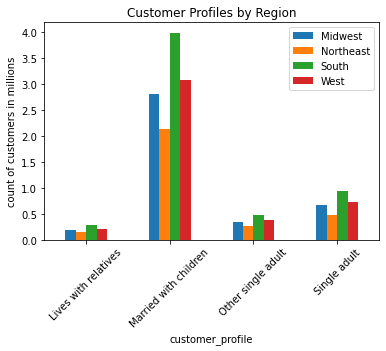

In [11]:
region_profile = (crosstab1/1000000).plot(kind='bar')
plt.title('Customer Profiles by Region')
plt.ylabel('count of customers in millions')
plt.xticks(rotation = 45)
plt.legend(loc = 'upper right')

In [12]:
region_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_regional.png'), bbox_inches = 'tight')

### Dependant Regions

In [13]:
#Creating a crosstab to see distribution of dependants across regions
crosstab2 = pd.crosstab(df['region'], df['number_of_dependants'], dropna = False)

In [14]:
crosstab2

number_of_dependants,0,1,2,3
region,,,,
Midwest,1006474,1019249,994416,979615
Northeast,746357,763983,749171,762481
South,1420125,1398179,1446010,1425265
West,1093508,1083119,1079125,1118366


> The South has more households with 2 dependants. The West has a higher count of households with 3 dependants. The Midwest has more households with 0 or 1 dependant. The Northeast has an interesting mix of higher counts with 1 or 3 dependants.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

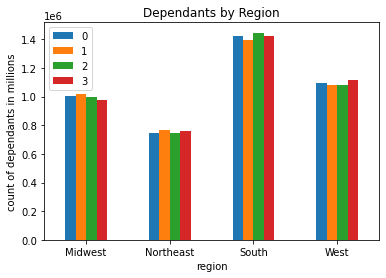

In [15]:
reg_dependants = crosstab2.plot(kind='bar')
plt.title('Dependants by Region')
plt.ylabel('count of dependants in millions')
plt.legend(loc = 'upper left')
plt.xticks(rotation = 0)

In [16]:
reg_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_dependants.png'), bbox_inches ='tight')

### Dependants by Customer Profile

In [17]:
#Comparing customer profiles and the number of dependants
crosstab3 = pd.crosstab(df['customer_profile'], df['number_of_dependants'], dropna = False)

In [18]:
crosstab3

number_of_dependants,0,1,2,3
customer_profile,,,,
Lives with relatives,0,285669,267671,268043
Married with children,0,3978861,4001051,4017684
Other single adult,1465754,0,0,0
Single adult,2800710,0,0,0


> Single adults and other single adults (represents those widowed or divorced) have zero dependants. Those living with relative and married with children(obviously) make up the categories with 1 to 3 children.

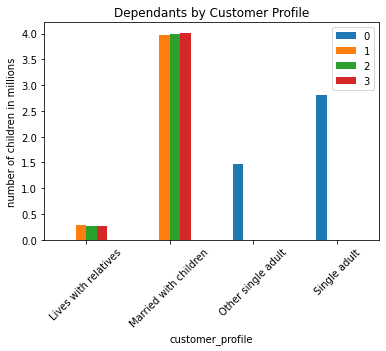

In [19]:
dependants = (crosstab3/1000000).plot(kind='bar')
plt.title('Dependants by Customer Profile')
plt.ylabel('number of children in millions')
plt.xticks(rotation = 45)
plt.legend(loc = 'upper right')

In [20]:
dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_customers.png'), bbox_inches = 'tight')

### Spending Flag Chart

In [21]:
crosstab4 = pd.crosstab(df['customer_profile'], df['spending_flag'], dropna = False)

In [22]:
crosstab4

spending_flag,High Spender,Low Spender
customer_profile,,
Lives with relatives,561900,259483
Married with children,8085776,3911820
Other single adult,993875,471879
Single adult,1888946,911764


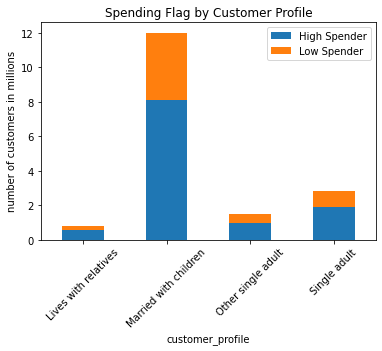

In [23]:
profile_spender = (crosstab4/1000000).plot(kind = 'bar', stacked= True)
plt.title('Spending Flag by Customer Profile')
plt.ylabel('number of customers in millions')
plt.xticks(rotation = 45)
plt.legend(loc = 'upper right')

In [24]:
profile_spender.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_spending.png'), bbox_inches = 'tight')

In [25]:
df['customer_profile'].value_counts() #count of customers in each profile category

Married with children    11997596
Single adult              2800710
Other single adult        1465754
Lives with relatives       821383
Name: customer_profile, dtype: int64

In [26]:
df['customer_profile'].value_counts().sum() #count of total IC customers in dataframe

17085443

In [27]:
#Checking total percentage of IC customers categorized as married with children
per_m = 11997596/17085443 
print(per_m)

0.7022115844464788


### Regional Spending

In [28]:
crosstab5 = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [137]:
crosstab5

spending_flag,High Spender,Low Spender
region,,
Midwest,2677947,1321807
Northeast,2054383,967609
South,3841327,1848252
West,2956840,1417278


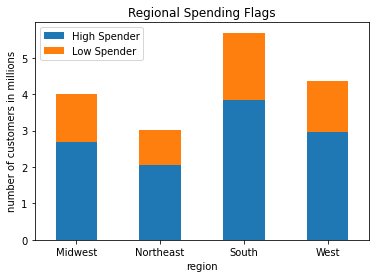

In [30]:
#Spending trend by region
regional_spending = (crosstab5/1000000).plot(kind='bar', stacked=True)
plt.title('Regional Spending Flags')
plt.ylabel('number of customers in millions')
plt.xticks(rotation = 0)
plt.legend().set_title('')

In [31]:
regional_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_spending_habit.png'), bbox_inches = 'tight')

### Loyalty by Spending Flag

In [32]:
crosstab6 = pd.crosstab(df['loyalty_flag'], df['spending_flag'], dropna = False)

In [33]:
crosstab6

spending_flag,High Spender,Low Spender
loyalty_flag,,
Loyal customer,5846486,0
New customer,0,2256122
Regular customer,5684011,3298824


- Loyal customers (those that have placed over 40 orders) are primarily high spenders with avg order prices of 10 dollars or higher. 
- New customers (those who have plave 10 or fewer orders) are primarily low spenders with avg order prices less than 10 dollars. 

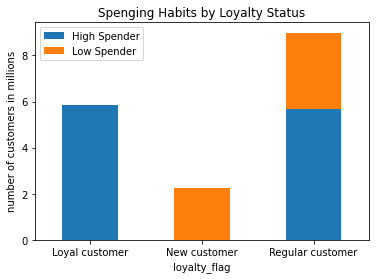

In [34]:
loyalty_spending = (crosstab6/1000000).plot(kind='bar', stacked=True)
plt.title('Spenging Habits by Loyalty Status')
plt.ylabel('number of customers in millions')
plt.ticklabel_format(style='plain', axis="y")
plt.xticks(rotation = 0)
plt.legend().set_title('')

In [35]:
loyalty_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_spending.png'), bbox_inches = 'tight')

### Changing variables in frequency_flag to better represent data

In [36]:
df_2 = df

In [37]:
df_2['frequency_flag'] = df_2['frequency_flag'].replace(['Frequent Customer'], 'Frequent Orders')

In [38]:
df['frequency_flag'].value_counts()

Frequent Orders          11905966
Regular Customer          3763322
Non Frequent Customer     1416155
Name: frequency_flag, dtype: int64

In [39]:
df_2['frequency_flag'] = df_2['frequency_flag'].replace(['Regular Customer'], 'Regular Orders')

In [40]:
df_2['frequency_flag'] = df_2['frequency_flag'].replace(['Non Frequent Customer'], 'Non Frequent Orders')

In [41]:
df_2['frequency_flag'].value_counts()

Frequent Orders        11905966
Regular Orders          3763322
Non Frequent Orders     1416155
Name: frequency_flag, dtype: int64

### Frequency and Loyalty Comparison

In [42]:
crosstab7 = pd.crosstab(df['loyalty_flag'], df['frequency_flag'], dropna = False)

In [43]:
crosstab7

frequency_flag,Frequent Orders,Non Frequent Orders,Regular Orders
loyalty_flag,,,
Loyal customer,5844517,0,1969
New customer,616554,899684,739884
Regular customer,5444895,516471,3021469


#### Return ordering frequency
- Frequent order - 10 or fewer days between orders, 
- Regular orders - more than 10 but 20 or fewer days between orders, 
- Non frequent orders - more than 20 days between orders
> Loyal customers order most frequently, new customers are more likely to be non frequent orderes. These variables will need to be used separatly in final visuals to reduce confusion.

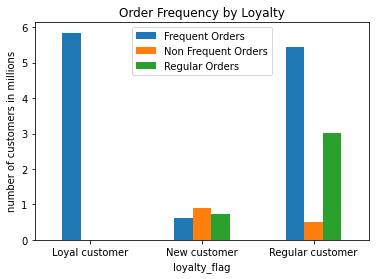

In [44]:
freq_loyalty = (crosstab7/1000000).plot(kind='bar')
plt.title('Order Frequency by Loyalty')
plt.ylabel('number of customers in millions')
plt.ticklabel_format(style='plain', axis="y")
plt.xticks(rotation = 0)
plt.legend().set_title('')

In [45]:
freq_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyatly_order_freq.png'), bbox_inches = 'tight')

### Order Frequency by Customer Profile

In [46]:
crosstab8 = pd.crosstab(df_2['customer_profile'], df_2['frequency_flag'], dropna = False)

In [47]:
crosstab8

frequency_flag,Frequent Orders,Non Frequent Orders,Regular Orders
customer_profile,,,
Lives with relatives,581218,67976,172189
Married with children,8359957,1001026,2636613
Other single adult,1028128,117486,320140
Single adult,1936663,229667,634380


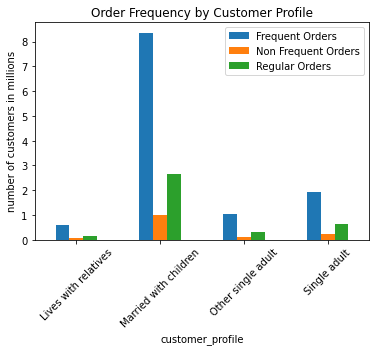

In [48]:
profile_freq = (crosstab8/1000000).plot(kind='bar')
plt.title('Order Frequency by Customer Profile')
plt.ylabel('number of customers in millions')
plt.ticklabel_format(style='plain', axis="y")
plt.xticks(rotation = 45)
plt.legend().set_title('')

In [49]:
profile_freq.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_order_freq.png'), bbox_inches = 'tight')

### Loyalty by Customer Profile

In [50]:
crosstab9 = pd.crosstab(df['customer_profile'], df['loyalty_flag'], dropna = False)

In [51]:
crosstab9

loyalty_flag,Loyal customer,New customer,Regular customer
customer_profile,,,
Lives with relatives,280486,103547,437350
Married with children,4096269,1588828,6312499
Other single adult,502669,188894,774191
Single adult,967062,374853,1458795


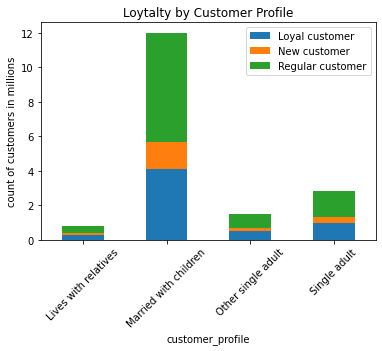

In [52]:
profile_loyalty = (crosstab9/1000000).plot(kind='bar', stacked = True)
plt.title('Loytalty by Customer Profile')
plt.ylabel('count of customers in millions')
plt.ticklabel_format(style='plain', axis="y")
plt.xticks(rotation = 45)
plt.legend().set_title('')

In [53]:
profile_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_loyalty.png'), bbox_inches = 'tight')

#### Regional Loyalty

In [54]:
crosstab10 = pd.crosstab(df['region'], df['loyalty_flag'], dropna = False)

In [55]:
crosstab10

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,1348211,531210,2120333
Northeast,1056771,394673,1570548
South,1930366,748683,3010530
West,1511138,581556,2281424


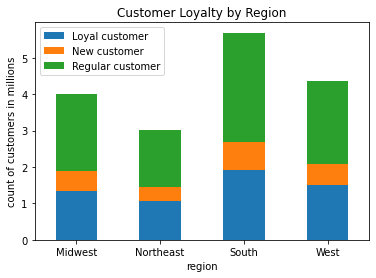

In [56]:
regional_loyalty = (crosstab10/1000000).plot(kind='bar', stacked=True)
plt.title('Customer Loyalty by Region')
plt.ylabel('count of customers in millions')
plt.ticklabel_format(style='plain', axis="y")
plt.xticks(rotation = 0)
plt.legend(loc = 'upper left')

In [57]:
regional_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_loyalty.png'), bbox_inches = 'tight')

### Price Range by Profile

In [58]:
crosstab11 = pd.crosstab(df['price_range_loc'], df['customer_profile'], dropna = False)

In [59]:
crosstab11

customer_profile,Lives with relatives,Married with children,Other single adult,Single adult
price_range_loc,,,,
High-range product,11020,165807,20220,36540
Low-range product,243805,3578443,437755,837449
Mid-range product,566558,8253346,1007779,1926721


(array([0, 1, 2]),
 [Text(0, 0, 'High-range product'),
  Text(1, 0, 'Low-range product'),
  Text(2, 0, 'Mid-range product')])

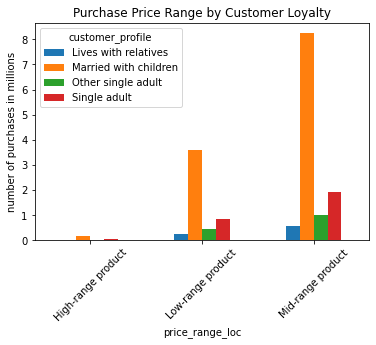

In [60]:
#Charting product price range frequency by loyalty status
loyal_price_range = (crosstab11/1000000).plot(kind='bar')
plt.title('Purchase Price Range by Customer Loyalty')
plt.ylabel('number of purchases in millions')
plt.ticklabel_format(style='plain', axis="y")
plt.xticks(rotation = 45)

In [61]:
#saving loyalty visual
loyal_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_chart.png'), bbox_inches = 'tight')

### Loyalty Product Price Ranges

In [62]:
crosstab12 = pd.crosstab(df['loyalty_flag'], df['price_range_loc'], dropna = False)

In [63]:
crosstab12

price_range_loc,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,72208,1720250,4054028
New customer,33019,682915,1540188
Regular customer,128360,2694287,6160188


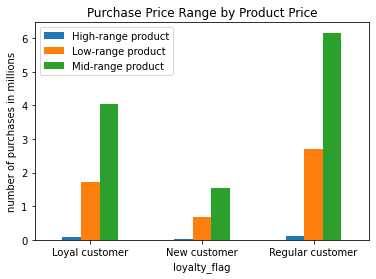

In [64]:
price_ranges_loyalty = (crosstab12/1000000).plot(kind='bar')
plt.title('Purchase Price Range by Product Price')
plt.ylabel('number of purchases in millions')
plt.ticklabel_format(style='plain', axis="y")
plt.xticks(rotation = 0)
plt.legend().set_title('')

In [65]:
price_ranges_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'product_ranges.png'), bbox_inches = 'tight')

In [131]:
crosstab13 = pd.crosstab(df['avg_price'], df['weekday'], dropna = False)

In [132]:
crosstab13

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
avg_price,,,,,,,
1.673684,3,0,1,45,0,0,1
1.830189,1,11,0,14,0,0,1
1.956522,2,1,0,0,0,0,13
2.013514,0,19,0,0,2,18,1
2.052632,11,0,0,14,0,0,4
...,...,...,...,...,...,...,...
60.169139,0,65,0,83,154,44,61
60.470937,0,85,15,102,56,76,85
62.137119,25,88,63,72,35,70,47


### Saving new dataframe

In [ ]:
df_2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers042121.pkl'))

### Price range variables

In [69]:
df['price_range_loc'].value_counts()/1000000

Mid-range product     11.754404
Low-range product      5.097452
High-range product     0.233587
Name: price_range_loc, dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'Mid-range product'),
  Text(1, 0, 'Low-range product'),
  Text(2, 0, 'High-range product')])

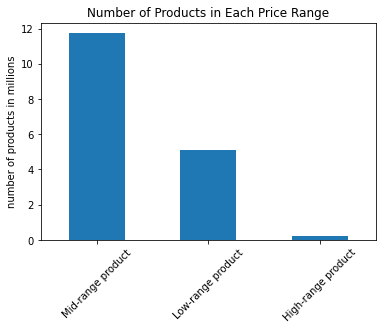

In [70]:
#Frequency of products within each price range
price_ranges_chrt = (df['price_range_loc'].value_counts()/1000000).plot(kind='bar')
plt.title('Number of Products in Each Price Range')
plt.ylabel('number of products in millions')
plt.ticklabel_format(style='plain', axis="y")
plt.xticks(rotation = 45)

In [71]:
price_ranges_chrt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'qty_price_ranges.png'), bbox_inches = 'tight')

### Busiest day of the week chart

In [72]:
busy_chart = df_2['weekday'].value_counts().rename_axis('day').to_frame(name='number of orders in millions')

In [73]:
busy_chart

,number of orders in millions
day,
Saturday,3254663
Sunday,2992782
Friday,2363475
Thursday,2228053
Monday,2219444
Tuesday,2024835
Wednesday,2002191


In [74]:
busy_chart['number of orders in millions']/=1000000

In [75]:
busy_chart

,number of orders in millions
day,
Saturday,3.254663
Sunday,2.992782
Friday,2.363475
Thursday,2.228053
Monday,2.219444
Tuesday,2.024835
Wednesday,2.002191


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Friday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Monday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

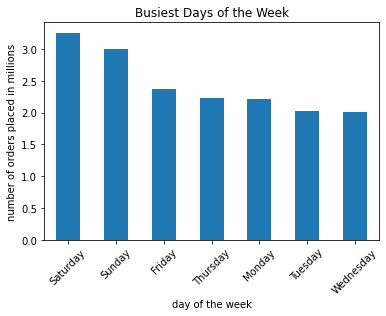

In [76]:
fig_x = busy_chart.plot.bar()
plt.legend('', frameon = False)
plt.title('Busiest Days of the Week')
plt.ylabel('number of orders placed in millions')
plt.xlabel('day of the week')
plt.ticklabel_format(style='plain', axis="y")
plt.xticks(rotation = 45)

In [77]:
fig_x.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busy_day-final.png'), bbox_inches = 'tight')

### Busiest Hours of the Day

In [78]:
df_2['order_hour_of_day'].value_counts(sort = True)

10    1464780
11    1442051
14    1417111
13    1399016
15    1398199
12    1373807
16    1328251
9     1311066
17    1089362
8      922913
18     852081
19     656965
20     512782
7      481324
21     422004
22     335786
23     210596
6      157288
0      114251
1       59899
5       46633
2       35672
4       27456
3       26150
Name: order_hour_of_day, dtype: int64

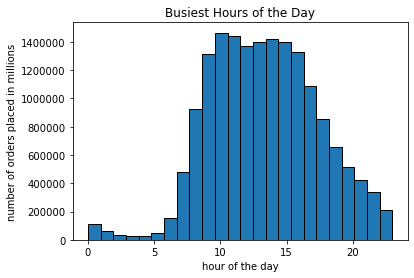

In [79]:
hours_histogram =df_2['order_hour_of_day'].plot.hist(bins = 24, edgecolor='black')
plt.title('Busiest Hours of the Day')
plt.ylabel('number of orders placed in millions')
plt.xlabel('hour of the day')
plt.ticklabel_format(style='plain', axis='y')

In [80]:
hours = df_2['order_hour_of_day'].value_counts(sort = False)/1000000

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

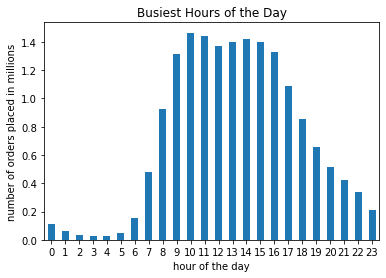

In [81]:
hours_histogram = hours.plot(kind='bar')
plt.title('Busiest Hours of the Day')
plt.ylabel('number of orders placed in millions')
plt.xlabel('hour of the day')
plt.xticks(rotation = 0)

In [82]:
hours_histogram.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_hours.png'), bbox_inches = 'tight')

### Creatin big and small subsets from df_2

In [83]:
dev=np.random.rand(len(df_2)) <=0.7

In [84]:
big = df_2[dev]

In [85]:
big.shape

(11957476, 33)

In [86]:
small = df_2[~dev]

In [87]:
small.shape

(5127967, 33)

In [88]:
df_2.shape

(17085443, 33)

### Average Order Price by Customer Profile

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Married with children'),
  Text(1, 0, 'Single adult'),
  Text(2, 0, 'Lives with relatives'),
  Text(3, 0, 'Other single adult')])

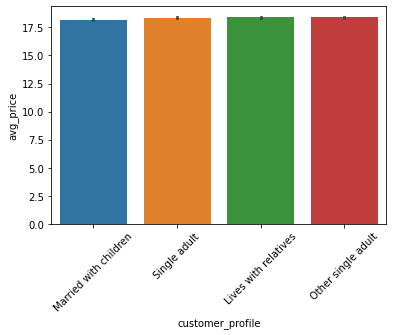

In [89]:
sns.barplot(data = small, x = 'customer_profile', y = 'avg_price')
plt.xticks(rotation = 45)

> This chart doesn't give much insight into actionable steps that can differentiate customer spending

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

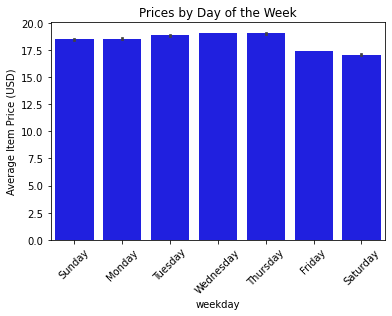

In [91]:
week_avg = sns.barplot(data = small, x = 'weekday', order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],y = 'avg_price', color='blue')
plt.title('Prices by Day of the Week')
plt.ylabel('Average Item Price (USD)')
plt.ticklabel_format(style='plain', axis="y")
plt.xticks(rotation = 45)

In [135]:
week_avg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_price+perDay.png'), bbox_inches = 'tight')

### Comparing age, income, and customer profile

Text(0, 0.5, 'income (USD)')

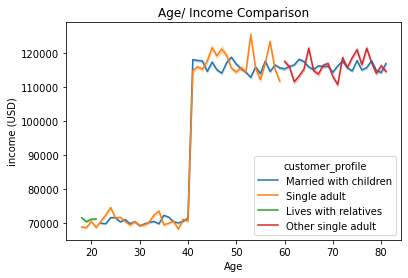

In [93]:
l2 = sns.lineplot(data = small, x = 'Age',y = 'income', hue ='customer_profile')
plt.title('Age/ Income Comparison')
plt.ylabel('income (USD)')

There's an anomoly around customers that are 40 years old, shown in the dramatic spiked line

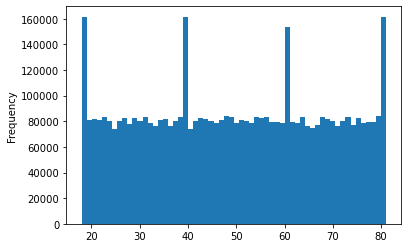

In [94]:
ages_hist = small['Age'].plot.hist(bins = 60)

C:\Users\cavba\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

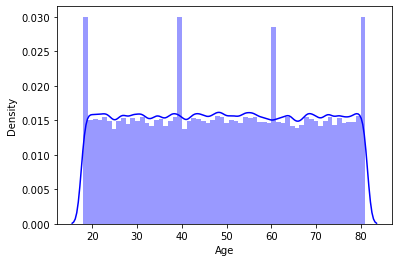

In [95]:
sns.distplot(small['Age'], color = 'blue', bins = 60)

(array([161233.,  80804.,  81457.,  81072.,  83021.,  79830.,  73953.,
         80260.,  82314.,  77705.,  82565.,  80468.,  83352.,  78353.,
         76400.,  80719.,  81425.,  76330.,  79892.,  83129., 161568.,
         74138.,  80555.,  82487.,  81987.,  80408.,  78484.,  81201.,
         83726.,  83201.,  78544.,  81202.,  79815.,  78982.,  83281.,
         82376.,  83179.,  79411.,  79233.,  78340., 153595.,  79137.,
         78876.,  83155.,  76223.,  74888.,  77253.,  83607.,  81770.,
         80453.,  76501.,  80567.,  83347.,  77160.,  82311.,  78815.,
         79515.,  79093.,  83777., 161524.]),
 array([18.  , 19.05, 20.1 , 21.15, 22.2 , 23.25, 24.3 , 25.35, 26.4 ,
        27.45, 28.5 , 29.55, 30.6 , 31.65, 32.7 , 33.75, 34.8 , 35.85,
        36.9 , 37.95, 39.  , 40.05, 41.1 , 42.15, 43.2 , 44.25, 45.3 ,
        46.35, 47.4 , 48.45, 49.5 , 50.55, 51.6 , 52.65, 53.7 , 54.75,
        55.8 , 56.85, 57.9 , 58.95, 60.  , 61.05, 62.1 , 63.15, 64.2 ,
        65.25, 66.3 , 67.35, 68

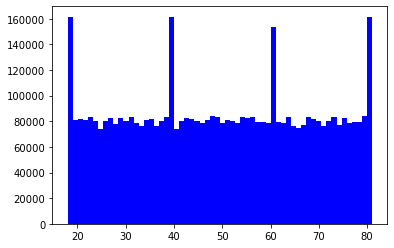

In [96]:
plt.hist(small['Age'], color = 'blue', bins = 60)

C:\Users\cavba\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

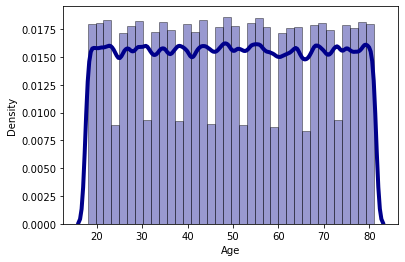

In [97]:
# Density Plot and Histogram of all ages
sns.distplot(df_2['Age'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\cavba\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


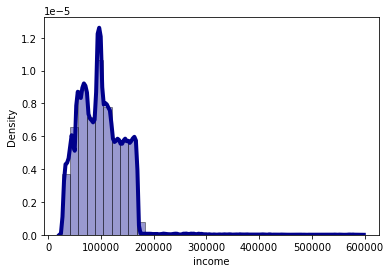

In [98]:
# Density Plot and Histogram of all incomes
incomehist40 = sns.distplot(df_2['income'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [126]:
#Exporting 40s incomes histogram
incomehist40.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_fourties.png'), bbox_inches = 'tight')

C:\Users\cavba\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


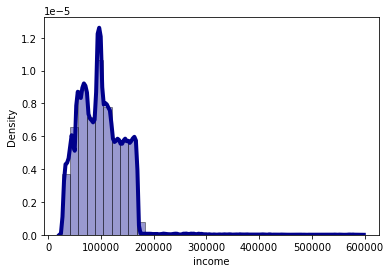

In [128]:
#Comparing full customer income distribution
full_income_distro = sns.distplot(df_2['income'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

> Overall income is similar to that of customers in their fourties with a right skewed distribution having more values under 200,000

In [129]:
full_income_distro.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_ALL.png'), bbox_inches = 'tight')

In [99]:
income_sub = df_2[['Age', 'income']]

In [100]:
income_sub.head()

,Age,income
0,48,165665
1,48,165665
2,48,165665
3,48,165665
4,48,165665


In [101]:
income_sub['Age'].value_counts()

79    280108
48    279266
31    278413
73    278290
68    278130
       ...  
60    253888
65    253387
66    250248
41    247692
25    246036
Name: Age, Length: 64, dtype: int64

C:\Users\cavba\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

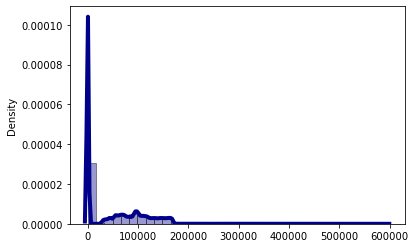

In [102]:
sns.distplot(income_sub, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [103]:
income_sub.describe()

,Age,income
count,1.708544e+07,1.708544e+07
mean,4.947110e+01,9.984568e+04
std,1.848798e+01,4.313958e+04
min,1.800000e+01,2.590300e+04
25%,3.300000e+01,6.752100e+04
50%,4.900000e+01,9.686300e+04
75%,6.500000e+01,1.282570e+05
max,8.100000e+01,5.939010e+05


In [104]:
income_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085443 entries, 0 to 18339448
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   Age     int64
 1   income  int64
dtypes: int64(2)
memory usage: 391.1 MB


In [105]:
income_40plus = income_sub[income_sub['Age'] >= 40]

In [106]:
income_40plus.head()

,Age,income
0,48,165665
1,48,165665
2,48,165665
3,48,165665
4,48,165665


In [107]:
income_40plus.describe()

,Age,income
count,1.120019e+07,1.120019e+07
mean,6.049425e+01,1.151498e+05
std,1.214163e+01,4.284399e+04
min,4.000000e+01,2.615400e+04
25%,5.000000e+01,9.458600e+04
50%,6.000000e+01,1.154100e+05
75%,7.100000e+01,1.428310e+05
max,8.100000e+01,5.939010e+05


In [108]:
income_40plus['Age'].value_counts(sort=False)

40    267551
41    247692
42    267841
43    273829
44    273654
45    267690
46    261199
47    268853
48    279266
49    277473
50    259659
51    272185
52    266522
53    262728
54    276586
55    275228
56    277526
57    263649
58    264218
59    261162
60    253888
61    258447
62    261350
63    263829
64    276881
65    253387
66    250248
67    257631
68    278130
69    272203
70    266808
71    254404
72    267524
73    278290
74    258830
75    275186
76    262444
77    265067
78    262842
79    280108
80    271007
81    267172
Name: Age, dtype: int64

> This subset shows that there is data included for all ages and incomes 40 and older

In [111]:
#Creating subset with ages 40 to 49 only
income_fourties = income_40plus[income_40plus['Age'] < 50]

In [112]:
income_fourties.head(100)

,Age,income
0,48,165665
1,48,165665
2,48,165665
3,48,165665
4,48,165665
...,...,...
263,43,49643
264,43,49643
265,43,49643
266,43,49643


In [113]:
income_fourties.shape

(2685048, 2)

In [114]:
income_fourties['Age'].value_counts(sort=False)

40    267551
41    247692
42    267841
43    273829
44    273654
45    267690
46    261199
47    268853
48    279266
49    277473
Name: Age, dtype: int64

Text(0.5, 1.0, 'Fourties/ Income Comparison')

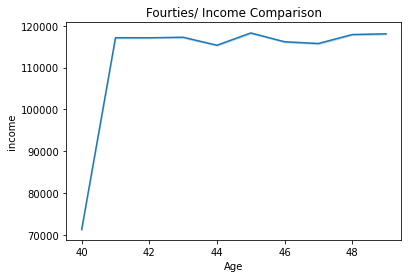

In [115]:
fourty_line = sns.lineplot(data = income_fourties, x = 'Age',y = 'income')
plt.title('Fourties/ Income Comparison')

In [116]:
fourty_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_line.png'), bbox_inches = 'tight')

In [118]:
income_fourties.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'fourties_income.csv'))

In [119]:
income_fourties.describe()

,Age,income
count,2.685048e+06,2.685048e+06
mean,4.455056e+01,1.124444e+05
std,2.874028e+00,4.490363e+04
min,4.000000e+01,2.615400e+04
25%,4.200000e+01,8.739900e+04
50%,4.500000e+01,1.120560e+05
75%,4.700000e+01,1.406080e+05
max,4.900000e+01,5.907900e+05


In [120]:
income_fourties.shape

(2685048, 2)

> There are over 2 million records of various incomes from customers between 40 and 49 years old

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Married with children'),
  Text(1, 0, 'Single adult'),
  Text(2, 0, 'Lives with relatives'),
  Text(3, 0, 'Other single adult')])

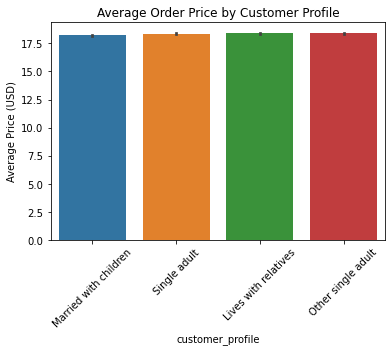

In [121]:
sns.barplot(data = small, x = 'customer_profile', y = 'avg_price')
plt.title('Average Order Price by Customer Profile')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation = 45)

### Checking distribution of customer income greater than $200000

C:\Users\cavba\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

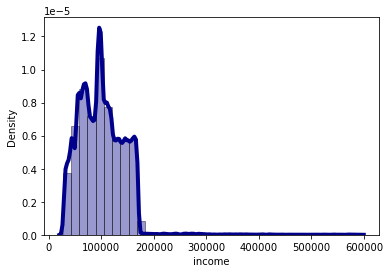

In [130]:
sns.distplot(small['income'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

> Income distribution is right skewed less than 1% of customers makes more than $200000

In [ ]:
(small['income'] > 200000).value_counts()

In [ ]:
(big['income'] > 200000).value_counts()

In [ ]:
(df_2['income'] > 200000).value_counts()

In [ ]:
#Percentage of customer incomes greater than $2k
print ((141862 / 16943581)*100)

### Creating a subset for incomes lower than $2k

In [ ]:
sub_2 = df_2[df_2['income'] < 200000]

In [ ]:
sub_2.head()

In [ ]:
sns.distplot(sub_2['income'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [ ]:
sns.lineplot(data = sub_2, x = 'Age',y = 'income', hue ='Gender')
plt.title('Gender/ Income Comparison')
plt.ylabel('income (USD)')

### Average order price per day

In [ ]:
sns.lineplot(data = small, x='weekday',  y='avg_price', sort=True)
plt.title('Average Order Price by Weekday')
plt.xlabel('Day')
plt.ylabel('Avg Price (usd)')

### Day of the week. Average price

In [ ]:
crosstab